In [109]:
from imgaug import augmenters as iaa
import numpy as np
import cv2
import os


#이미지 읽어오는 함수
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
   
    
#이미지 저장 함수
def write_images(filename,number,images):
    for i in range(0,len(images)):
        cv2.imwrite('./data/%s/%s_%d.jpg'%(filename,number,i), images[i]) #이미지 저장할 경로 설정을 여기서 한다.
    print("image saving complete")
    
# 여러 폴더에 한번에 저장하기 
def imagewriterfunction(folder, images):
    for i in range(0,len(images)):
        write_images(folder, str(i), images[i])
    print("all images saved to folder")    

    
#이미지 증강 코드
def data_augmentations(images):
    # aug : flip
    seq_fliplr = iaa.Sequential([
        iaa.Fliplr(1.0) # horizontal flip
    ])
    seq_flipud = iaa.Sequential([
        iaa.Flipud(1.0) # verticla flip
    ])
    
    # aug : rotate
    seq_rotate45 = iaa.Sequential([
        iaa.Rotate((45, 45)) # rotate 45
    ])
    seq_rotate90 = iaa.Sequential([
        iaa.Rotate((90, 90)) # rotate 90
    ])
    seq_rotate135 = iaa.Sequential([
        iaa.Rotate((135, 135)) # rotate 135
    ])
    seq_rotate180 = iaa.Sequential([
        iaa.Rotate((180, 180)) # rotate 180
    ])
    seq_rotate225 = iaa.Sequential([
        iaa.Rotate((225, 225)) # rotate 225
    ])
    seq_rotate270 = iaa.Sequential([
        iaa.Rotate((270, 270)) # rotate 270
    ])
    seq_rotate315 = iaa.Sequential([
        iaa.Rotate((315, 315)) # rotate 315
    ])
    
    # aug : shear
    seq_shearXY = iaa.Sequential([
        iaa.ShearX((-20, 20)), # shear X between (-20, 20)
        iaa.ShearY((-20, 20)) # shear Y between (-20, 20)
    ])
    seq_shearYX = iaa.Sequential([
        iaa.ShearY((-20, 20)), # shear Y between (-20, 20)
        iaa.ShearX((-20, 20)) # shear X between (-20, 20)
    ])
    
    # aug : piece wise affine
    seq_PWA = iaa.Sequential([
        iaa.PiecewiseAffine(scale=(0.01, 0.05)) # piece wise affine
    ])
    
    # aug : perspective transform
    seq_PT = iaa.Sequential([
        iaa.PerspectiveTransform(scale=(0.01, 0.15)) # piece wise affine
    ])
    
    
    # aug flip : 적용
    print("data_augmentations : begin\n")
    
    data_filplr = seq_fliplr.augment_images(images)
    print("sequence fliplr completed......")
    data_flipud = seq_flipud.augment_images(images)
    print("sequence flipud completed......")
    
    # aug roate : 적용
    data_rotate45 = seq_rotate45.augment_images(images)
    print("sequence rotate 45 completed......")
    data_rotate90 = seq_rotate90.augment_images(images)
    print("sequence rotate 90 completed......")
    
    data_rotate135 = seq_rotate135.augment_images(images)
    print("sequence rotate 135 completed......")
    data_rotate180 = seq_rotate180.augment_images(images)
    print("sequence rotate 180 completed......")
    
    data_rotate225 = seq_rotate225.augment_images(images)
    print("sequence rotate 225 completed......")
    data_rotate270 = seq_rotate270.augment_images(images)
    print("sequence rotate 270 completed......")
    
    data_rotate315 = seq_rotate315.augment_images(images)
    print("sequence rotate 315 completed......")
    
    # aug shear : 적용
    data_shearXY = seq_shearXY.augment_images(images)
    print("sequence shear XY completed......")
    data_shearYX = seq_shearYX.augment_images(images)
    print("sequence shear YX completed......")
    
    # aug PWA : 적용
    data_PWA = seq_PWA.augment_images(images)
    print("sequence PWA completed......")
    
    # aug PT : 적용
    data_PT = seq_PT.augment_images(images)
    print("sequence shear PT completed......")
    
    print("\ndata_augmentations : end")
    
    data_augmentation_list = [data_filplr, data_flipud, # flip
                              data_rotate45, data_rotate90, # rotate : 1사분면
                              data_rotate135, data_rotate180, # rotate : 2사분면
                              data_rotate225, data_rotate270, # rotate : 3사분면
                              data_rotate315, # rotate : 4사분면
                              data_shearXY, data_shearYX, # shear
                              data_PWA, # piece wise affine
                              data_PT # perspective transform
                             ]
    return data_augmentation_list

In [110]:
train_dataset = load_images_from_folder("./data/FerriteSteel")

train_dataset

[array([[[ 59,  59,  59],
         [ 60,  60,  60],
         [ 56,  56,  56],
         ...,
         [163, 163, 163],
         [159, 159, 159],
         [162, 162, 162]],
 
        [[ 96,  96,  96],
         [ 70,  70,  70],
         [ 63,  63,  63],
         ...,
         [162, 162, 162],
         [159, 159, 159],
         [163, 163, 163]],
 
        [[124, 124, 124],
         [116, 116, 116],
         [119, 119, 119],
         ...,
         [161, 161, 161],
         [161, 161, 161],
         [157, 157, 157]],
 
        ...,
 
        [[132, 132, 132],
         [132, 132, 132],
         [131, 131, 131],
         ...,
         [166, 166, 166],
         [166, 166, 166],
         [166, 166, 166]],
 
        [[129, 129, 129],
         [136, 136, 136],
         [128, 128, 128],
         ...,
         [165, 165, 165],
         [165, 165, 165],
         [166, 166, 166]],
 
        [[118, 118, 118],
         [135, 135, 135],
         [122, 122, 122],
         ...,
         [164, 164, 164],
  

In [111]:
augmented_train_dataset = data_augmentations(train_dataset)

print("size of augmentation :", len(augmented_train_dataset[0]) * len(augmented_train_dataset))

data_augmentations : begin

sequence fliplr completed......
sequence flipud completed......
sequence rotate 45 completed......
sequence rotate 90 completed......
sequence rotate 135 completed......
sequence rotate 180 completed......
sequence rotate 225 completed......
sequence rotate 270 completed......
sequence rotate 315 completed......
sequence shear XY completed......
sequence shear YX completed......
sequence PWA completed......
sequence shear PT completed......

data_augmentations : end
size of augmentation : 533


In [112]:
for aug in range(len(augmented_train_dataset)):
    write_images('FerriteSteel', aug, augmented_train_dataset[aug]) 
#write_images('FerriteSteel', 1, trian_dataset_aug[1])

image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete
image saving complete


# AnoGAN_2018.12.25_SJH_FINAL

--- 

# Module

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.utils import save_image
import os
import numpy as np

import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils

# Graph & Animation
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Hyper Parameter

In [2]:
latent_size   =  100  # z벡터의 잠재공간(latent space)의 크기
workers       =  4    # 0일때, 약 20% 사용 4일 경우 메모리 100%
image_size    =  64
channel       =  1
num_epochs    =  100
batch_size    =  64
learning_rate =  1e-5

#fms          =  64   # feature_map_size
#sample_dir   =  'samples'
#num_epochs   =  200
#batch_size   =  100

# Data and Device

In [4]:
# 이미지 경로, 이미지들 리사이즈 및 텐서형태로 만들기
#dataroot = "./dataset"

#dataroot = "./image/new_steel_2/train"
dataroot = "./data/train"

#dataroot = "./dataset/train"
dataset = dset.ImageFolder(root = dataroot,
                           transform = transforms.Compose([
                                  #transforms.Resize(image_size),
                                  transforms.CenterCrop(image_size),
                                  torchvision.transforms.Grayscale(channel),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,),(0.5,))
                              ]))

# 배치로 나누고 셔플하기
dataloader = torch.utils.data.DataLoader(dataset, batch_size = batch_size,
                                         shuffle = True, num_workers = workers, drop_last=True)

# Device setting (GPU or CPU)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


# MODEL

In [5]:
# Generative Adversarial Networks Model

class Generator(nn.Module):
    # nn.convTranspose2d(input,output,kernl,stride,padding,bias)
    
    def __init__(self):
        super(Generator,self).__init__()
        self.G_layer1 = nn.Sequential(    
            
            # ----------------input is latent_size 100--------------------
            nn.ConvTranspose2d(latent_size,512,4,1,0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(),
        
            # -----------------state size 512x4x4-------------------------
            nn.ConvTranspose2d(512, 256 , 4, 2, 1, bias=False ),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            
            # -----------------state size 256x8x8--------------------------
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False ),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            # -----------------state size 128x16x16-------------------------
            nn.ConvTranspose2d(128, 64 , 4, 2, 1, bias=False ),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            
            # ------------------state size 64x32x32--------------------------
            nn.ConvTranspose2d(64, 1 , 4, 2, 1, bias=False ),
            nn.Tanh() # 픽셀값의 범위 : -1 ~ 1로 두기 위해서
            
            # state size 1x64x64
        )
    
    def forward(self, input):
        out = self.G_layer1(input)
        return out

class Discriminator(nn.Module):
    # nn.conv2d(input,output,kernl,stride,padding,bias)
    
    def __init__(self):
        super(Discriminator, self).__init__()
        
        # ===================== Feature 추출 layer ====================
        self.D_feature = nn.Sequential(
            # -------------input is 1 x 64 x 64----------------------
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            
            # -------------state size 64x32x32-----------------------
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            
            # --------------state size 128x16x16---------------------
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            # --------------state size 256x8x8------------------------
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
        )
        
        # =================== Binary classification 1 or 0 layer ==========
        self.D_final=nn.Sequential(
            
            # ---------------state size 512x4x4-------------------------
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            #nn.Linear(fms*8*4*4, 1, bias=False),
            nn.Sigmoid()        
        )
        
    def forward(self, input):
        out = self.D_feature(input)
        #out = out.view(out.size()[0], -1)
        feature = out
        out = self.D_final(out)
        
        return out,feature
        

# Loss & Optim

In [6]:
# G and D 무게 초기화, classname 에 찾는 name가 없다면 -1 ,
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# D,G 네트워크 모델 객체 선언
D = Discriminator().to(device)
G = Generator().to(device)

# weight initialize/ nn.Module 클래스 안에 apply 함수가 정의되 있음, 각 함수들에 다 적용 하게한다
D.apply(weights_init)
G.apply(weights_init)

# Binary cross entropy loss and optimizer
criterion = nn.BCELoss()

# latent vector에 배치 사이즈 64를 적용
# 학습한 G로 새로운 것 만들어서 결과 확인 할때 사용
noise_z = torch.randn(64, latent_size, 1, 1, device = device)

# D와 G에 대해 두가지 최적화 설정
D_optimizer = torch.optim.Adam(D.parameters(), lr = learning_rate, betas=(0.5,0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr = learning_rate, betas=(0.5,0.999))

#print(D)
#print(G)

def reset_grad():
    D_optimizer.zero_grad()
    G_optimizer.zero_grad()

# Train

In [7]:


img_list = []
G_losses = []
D_losses = []
iters = 0

for epoch in range(num_epochs):
    
    # 인덱스 0부터 세기 시작
    # data[0].size():64x1x64x64(image) / data[1].size():64(label)
    for i,data in enumerate(dataloader,0):
        
        # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        # =============================================================
        #                       Train Discriminator
        # =============================================================
        image       =  data[0].to(device)  # image size: 64x1x64x64(batch, channel, width, height)
        b_size      =  image.size(0)       # b_size = 64
        real_labels =  torch.ones(b_size, 1).to(device)
        fake_labels =  torch.zeros(b_size, 1).to(device)
        
        # (--------------------------real-----------------------------)
        output,_   =  D(image) # output = D(x)
        loss_real  =  criterion(output, real_labels) # D(x)=1일 때의 loss
        real_score =  output
        D_x        =  real_score.mean().item() 
            
        # (--------------------------fake-----------------------------)
        z          =  torch.randn(b_size, latent_size, 1, 1).to(device) # z size :64x100x1x1
        fake_image =  G(z)
        output,_   =  D(fake_image) # output = D(G(z))
        loss_fake  =  criterion(output, fake_labels) # D(G(z))=0일 때의 loss
        fake_score =  output
        D_G_z1     =  fake_score.mean().item()

        # (------------------Backprop and optimize---------------------)
        loss_D     =  loss_real + loss_fake 
        reset_grad()
        loss_D.backward()
        D_optimizer.step() # D(x)=1, D(G(z))=0이어야 D가 최적
        
        # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        
        # =============================================================
        #                       Train Generater
        # =============================================================
        #z          = torch.randn(b_size,latent_size,1,1,device=device) # z size :64x100x1x1
        for k in range(4):
            fake_image = G(z)
            output,_   = D(fake_image)  # output : D(G(z))
            D_G_z2     = output.mean().item()
            loss_G     = criterion(output, real_labels) # D(G(z))=1일 때의 loss=log(D(G(z)))

            # (------------------Backprop and optimize---------------------)
            reset_grad()
            loss_G.backward()
            G_optimizer.step() # D(G(z))=1 이어야 G가 최적

            # ==> D(G(z))의 값이 0.5로 수렴해야 한다.
        
        # @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
        
        
        # ---------------------------------------------------------------------------------
        #                                               print
        # ---------------------------------------------------------------------------------
        if i%50 == 0:
            print('[%d/%d][%d/%d]\n- Loss_D: %.4f / Loss_G:%.4f\n- D(x):%.4f / D(G(z1)):%.4f / D(G(z2)):%.4f' 
                  %(epoch+1, num_epochs, i, len(dataloader),loss_D.item(),
                    loss_G.item(),D_x,D_G_z1,D_G_z2))
        
        # Save Losses for plotting later
        G_losses.append(loss_G.item())
        D_losses.append(loss_D.item())
        
        #Check how the generator is doing by saving G's output on noise_z
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = G(noise_z).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))
            
        iters += 1
        
#torch.save(G.state_dict(), 'G.ckpt')
#torch.save(D.state_dict(), 'D.ckpt')

/home/piai/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


[1/100][0/8]
- Loss_D: 1.3804 / Loss_G:0.6870
- D(x):0.5040 / D(G(z1)):0.5011 / D(G(z2)):0.5031
[2/100][0/8]
- Loss_D: 1.3892 / Loss_G:0.6703
- D(x):0.5086 / D(G(z1)):0.5099 / D(G(z2)):0.5116
[3/100][0/8]
- Loss_D: 1.3902 / Loss_G:0.6627
- D(x):0.5131 / D(G(z1)):0.5146 / D(G(z2)):0.5155
[4/100][0/8]
- Loss_D: 1.3886 / Loss_G:0.6601
- D(x):0.5156 / D(G(z1)):0.5162 / D(G(z2)):0.5168
[5/100][0/8]
- Loss_D: 1.3865 / Loss_G:0.6596
- D(x):0.5170 / D(G(z1)):0.5165 / D(G(z2)):0.5171
[6/100][0/8]
- Loss_D: 1.3845 / Loss_G:0.6555
- D(x):0.5205 / D(G(z1)):0.5188 / D(G(z2)):0.5192
[7/100][0/8]
- Loss_D: 1.3796 / Loss_G:0.6590
- D(x):0.5216 / D(G(z1)):0.5173 / D(G(z2)):0.5174
[8/100][0/8]
- Loss_D: 1.3707 / Loss_G:0.6610
- D(x):0.5249 / D(G(z1)):0.5161 / D(G(z2)):0.5163
[9/100][0/8]
- Loss_D: 1.3592 / Loss_G:0.6631
- D(x):0.5301 / D(G(z1)):0.5154 / D(G(z2)):0.5153
[10/100][0/8]
- Loss_D: 1.3542 / Loss_G:0.6699
- D(x):0.5292 / D(G(z1)):0.5120 / D(G(z2)):0.5118
[11/100][0/8]
- Loss_D: 1.3444 / Loss_G

[86/100][0/8]
- Loss_D: 0.7148 / Loss_G:1.3184
- D(x):0.6757 / D(G(z1)):0.2737 / D(G(z2)):0.2676
[87/100][0/8]
- Loss_D: 0.7126 / Loss_G:1.2672
- D(x):0.6886 / D(G(z1)):0.2860 / D(G(z2)):0.2816
[88/100][0/8]
- Loss_D: 0.7215 / Loss_G:1.2874
- D(x):0.6805 / D(G(z1)):0.2835 / D(G(z2)):0.2760
[89/100][0/8]
- Loss_D: 0.6640 / Loss_G:1.3615
- D(x):0.6967 / D(G(z1)):0.2593 / D(G(z2)):0.2563
[90/100][0/8]
- Loss_D: 0.6662 / Loss_G:1.3752
- D(x):0.6916 / D(G(z1)):0.2547 / D(G(z2)):0.2528
[91/100][0/8]
- Loss_D: 0.7002 / Loss_G:1.3226
- D(x):0.6833 / D(G(z1)):0.2707 / D(G(z2)):0.2665
[92/100][0/8]
- Loss_D: 0.6512 / Loss_G:1.3901
- D(x):0.6992 / D(G(z1)):0.2517 / D(G(z2)):0.2491
[93/100][0/8]
- Loss_D: 0.6359 / Loss_G:1.3348
- D(x):0.7158 / D(G(z1)):0.2590 / D(G(z2)):0.2632
[94/100][0/8]
- Loss_D: 0.8605 / Loss_G:1.0380
- D(x):0.6701 / D(G(z1)):0.3664 / D(G(z2)):0.3542
[95/100][0/8]
- Loss_D: 0.7239 / Loss_G:1.3259
- D(x):0.6700 / D(G(z1)):0.2735 / D(G(z2)):0.2656
[96/100][0/8]
- Loss_D: 0.6683

# Graph

No handles with labels found to put in legend.


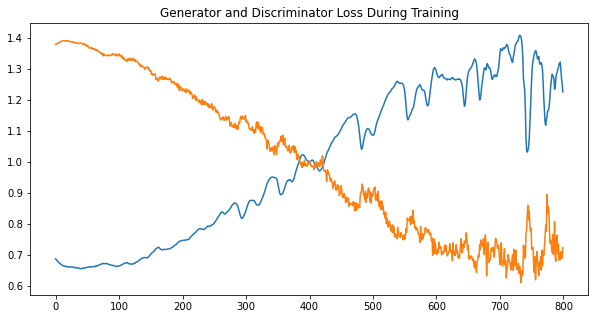

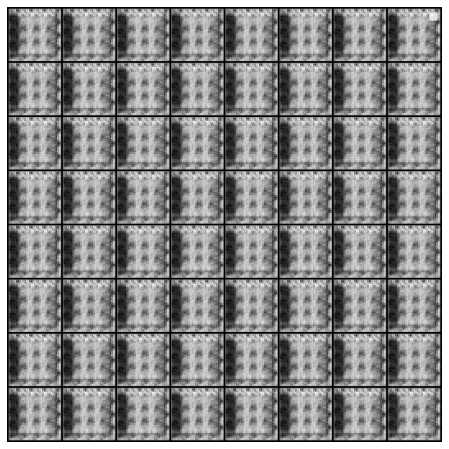

In [9]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses, label="G")
plt.plot(D_losses,label="D")
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims=[[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
HTML(ani.to_jshtml())
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Animation

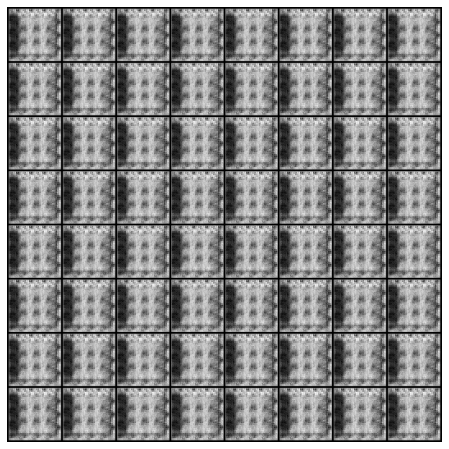

In [10]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims=[[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
HTML(ani.to_jshtml())

# Anomaly Loss

In [11]:
latent_vector = torch.randn(1, latent_size, 1, 1, device = device, requires_grad=True)
def Anomaly_loss(Test_Data, G_Data, Lambda=0.1):
    
    _, Test_Data_feature =  D(Test_Data)
    _, G_Data_feature    =  D(G_Data)
    loss_residual        =  torch.sum(torch.abs(Test_Data - G_Data))
    loss_discrimination  =  torch.sum(torch.abs(Test_Data_feature - G_Data_feature))
    loss_ano             =  (1-Lambda)*loss_residual + Lambda*loss_discrimination
    
    return loss_ano

z_optimizer = torch.optim.Adam([latent_vector],lr=0.01,betas=(0.5, 0.999))

test_dataroot = "./data/test"
#test_dataroot = "./dataset/test"
test_dataset = dset.ImageFolder(root = test_dataroot,
                           transform = transforms.Compose([
                                  transforms.Resize(image_size),
                                  transforms.CenterCrop(image_size),
                                  torchvision.transforms.Grayscale(channel),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,),(0.5,))
                              ]))

# 배치로 나누고 셔플하기
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 1,
                                         shuffle = False, num_workers = workers)

# Train Latent Space Z

In [12]:
latent_space = []
auc=[]
for i,data in enumerate(test_dataloader,0):
    test_image = data[0].to(device)
    print("picture ",i+1)
    for step in range(401):

        G_Data   = G(latent_vector)
        loss_ano = Anomaly_loss(test_image, G_Data)

        z_optimizer.zero_grad()

        # residual loss, dicriminator loss 의 그래디언트를 학습 가능한 weight에 독립적으로 반역하기 위해서
        # 한쪽 로스를 업데이트하면 그래디언트가 해제되서 
        loss_ano.backward(retain_graph = True)
        
        z_optimizer.step()

        if step%200 == 0:

            loss   = loss_ano.item()
            noises = torch.sum(latent_vector).item()
            print("[%d]\t loss_Ano:%.4f  Sum_of_z:%.4f" %(step,loss,noises))
            if step==400:
                latent_space.append(latent_vector.cpu().data.numpy())
                if loss>500:
                    auc.append(1)
                else :
                    auc.append(0)
latent_space = np.array(latent_space)
latent_space = torch.Tensor(latent_space).to(device)

picture  1
[0]	 loss_Ano:1370.4476  Sum_of_z:1.2640
[200]	 loss_Ano:1361.6710  Sum_of_z:6.9559
[400]	 loss_Ano:1360.8478  Sum_of_z:9.1506
picture  2
[0]	 loss_Ano:1404.8544  Sum_of_z:9.4012
[200]	 loss_Ano:1390.8199  Sum_of_z:4.5779
[400]	 loss_Ano:1390.2494  Sum_of_z:8.0579
picture  3
[0]	 loss_Ano:1463.6368  Sum_of_z:7.9288
[200]	 loss_Ano:1460.5566  Sum_of_z:0.2299
[400]	 loss_Ano:1459.5605  Sum_of_z:-5.1664
picture  4
[0]	 loss_Ano:978.0715  Sum_of_z:-4.9508
[200]	 loss_Ano:970.9824  Sum_of_z:10.1895
[400]	 loss_Ano:969.9396  Sum_of_z:11.0526
picture  5
[0]	 loss_Ano:1175.5328  Sum_of_z:11.1460
[200]	 loss_Ano:1173.4041  Sum_of_z:14.7855
[400]	 loss_Ano:1173.1343  Sum_of_z:15.9940
picture  6
[0]	 loss_Ano:938.7298  Sum_of_z:15.8812
[200]	 loss_Ano:937.1152  Sum_of_z:6.4924
[400]	 loss_Ano:936.9818  Sum_of_z:5.1136
picture  7
[0]	 loss_Ano:751.1492  Sum_of_z:5.0315
[200]	 loss_Ano:743.4423  Sum_of_z:-3.3087
[400]	 loss_Ano:743.0501  Sum_of_z:-4.5213
picture  8
[0]	 loss_Ano:1078.900

# Similar Z , Ano_Score and Segementation


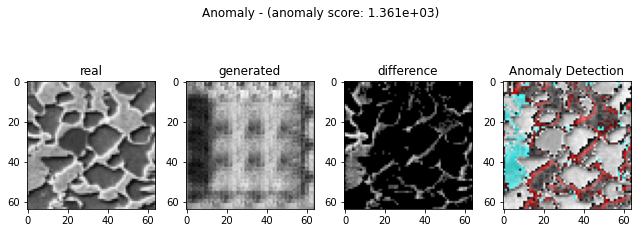

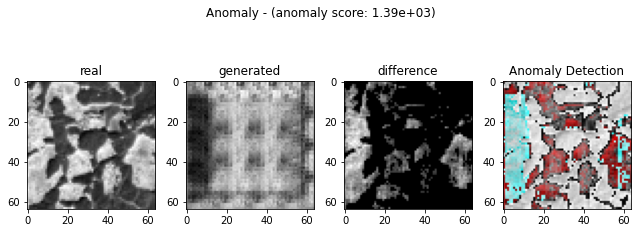

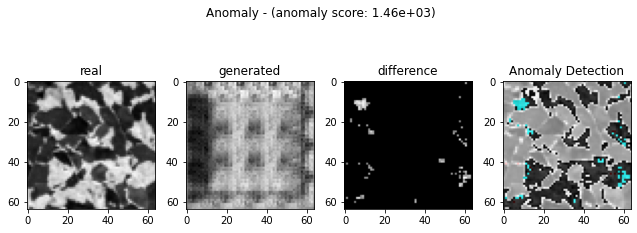

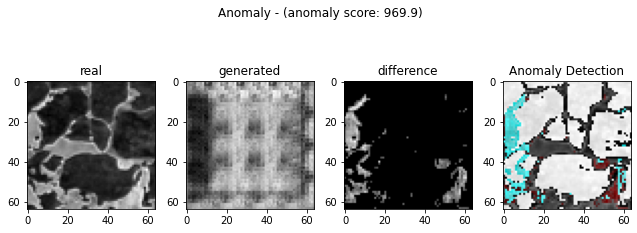

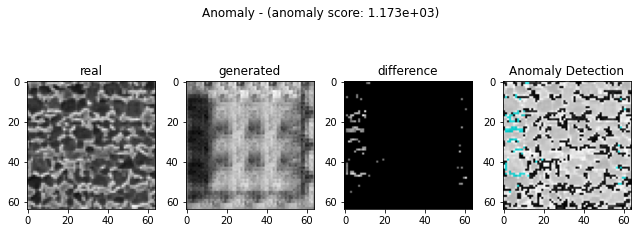

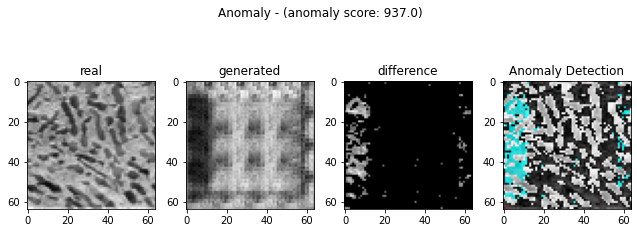

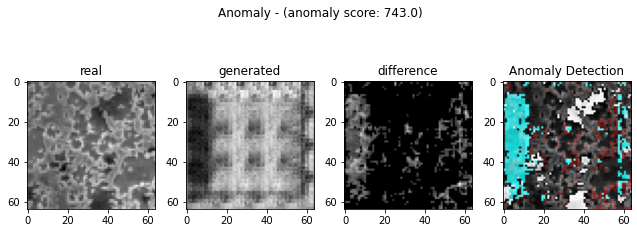

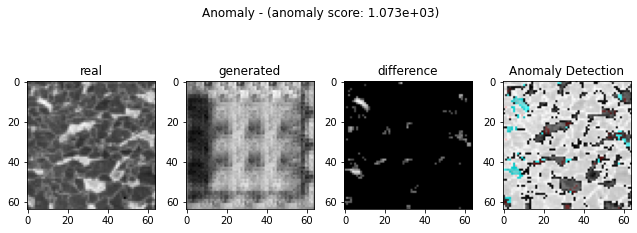

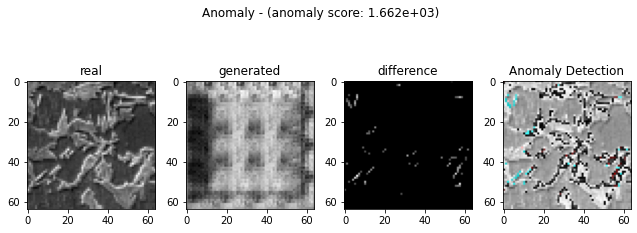

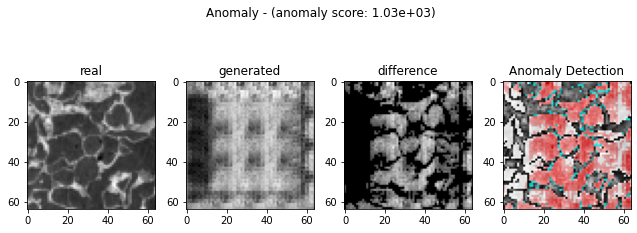

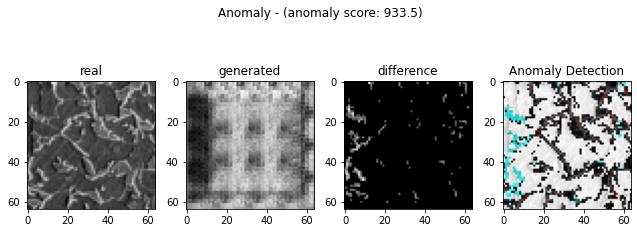

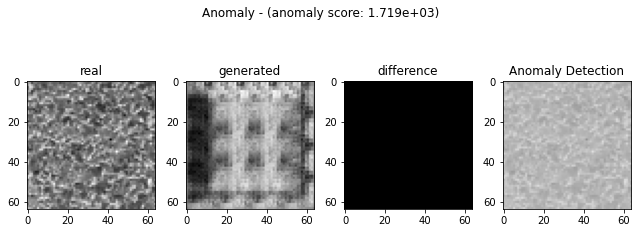

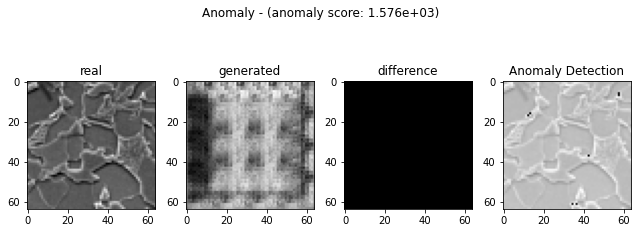

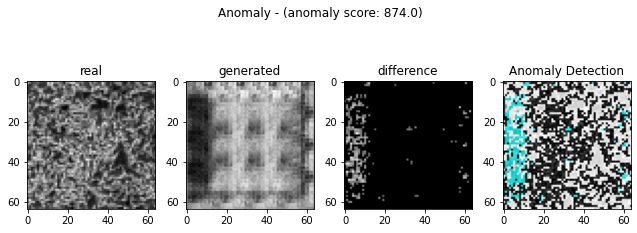

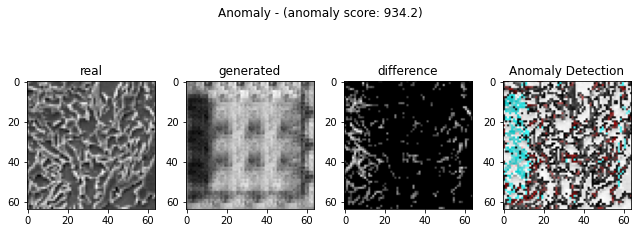

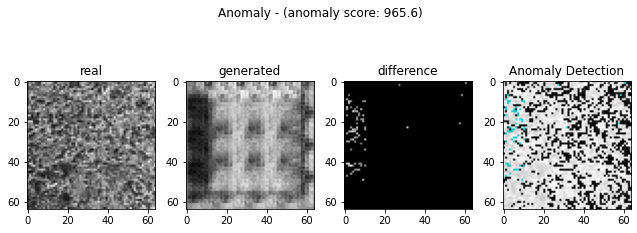

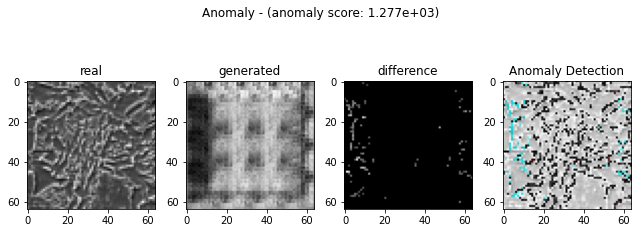

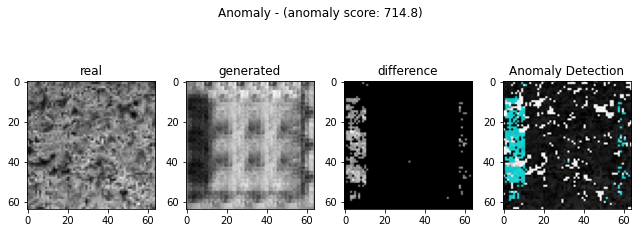

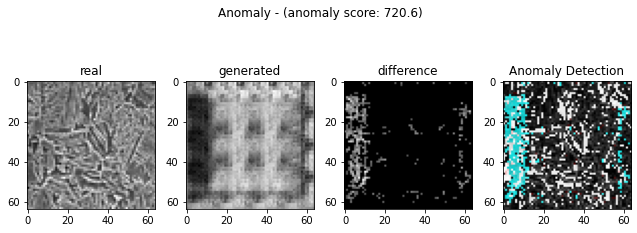

In [15]:
def compare_images(real_img, generated_img,i, reverse=False, threshold=50):
    score = Anomaly_loss(real_img, generated_img)
    score = round(score.item(), 2)
    
    real_img = real_img.cpu().data.numpy().reshape(64, 64) * 255
    generated_img = generated_img.cpu().data.numpy().reshape(64, 64) * 255
    
    #generated_img = generated_img.astype(np.uint8)
    
    negative = np.zeros_like(real_img)
    
    if not reverse:
        diff_img = real_img - generated_img
    else:
        diff_img = generated_img - real_img
    diff_img[diff_img <= threshold] = 0
    
    anomaly_img = np.zeros(shape=(64, 64, 3))
    anomaly_img[:, :, 0] = real_img - diff_img
    anomaly_img[:, :, 1] = real_img - diff_img
    anomaly_img[:, :, 2] = real_img - diff_img
    anomaly_img[:, :, 0] = anomaly_img[:,:,0] + diff_img
    anomaly_img = anomaly_img.astype(np.uint8)
    
    fig, plots = plt.subplots(1, 4)
    if auc[i]==0:
        fig.suptitle(f'Normal - (anomaly score: {score:.4})')
    else :
        fig.suptitle(f'Anomaly - (anomaly score: {score:.4})')
    
    fig.set_figwidth(9)
    fig.set_tight_layout(True)
    plots = plots.reshape(-1)
    plots[0].imshow(real_img, cmap='gray', label = "real")
    plots[1].imshow(generated_img, cmap='gray')
    plots[2].imshow(diff_img, cmap='gray')
    plots[3].imshow(anomaly_img)
    
    plots[0].set_title('real')
    plots[1].set_title('generated')
    plots[2].set_title('difference')
    plots[3].set_title('Anomaly Detection')

vali_label=[0,0,0,0,0,1,1,1,1,1,1]
for i,data in enumerate(test_dataloader,0):
    test_image = data[0].to(device)

    #for i in range(len(latent_space)):
    update_z =  latent_space[i]
    R_img    =  test_image
    G_img    =  G(update_z).to(device)
    if i in [9]:
        compare_images(R_img, G_img,i,reverse = True, threshold = 50)
    else:
        compare_images(R_img, G_img,i,reverse = False, threshold = 50)